In [1]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf #Tensorflow handles the Training and Testing
from tensorflow import keras #Keras handles the importing of Data
import numpy as np #NumPy does funny math good
import matplotlib.pyplot as plt #MatPlotLib visualizes data
from PIL import Image #Image processing Library

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz") # loads MNIST Digits dataset and splits it into training and testing data

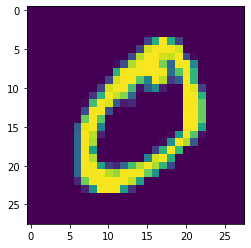

In [3]:
#Uses MatPlot to show the first digit
plt.figure()
plt.imshow(train_images[1])
plt.show()

In [4]:
#Data Formatting: Converts the 0-255 int range of each pixel to a 0-1 float  
train_images = train_images / 255.0
test_images = test_images / 255.0
#Note: You can't use /= for some reason. Something about datatype mismatch

In [5]:
#Creating the Network: Sets up the NN Structure, connection types, and activation functions
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Sets input layer equal to flattened 28x28       
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),                     
])

In [6]:
#Compile the Model: Sets up the models loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#Training the model: feeds in training images and labels to create preliminary connections
model.fit(train_images, train_labels, epochs=12) 
# Note: Epochs are the number of thimes the data is fed through the system
#       More epochs are not necessarily good as you risk overfitting a model which is where the model is 
#       more or less remembering the data rather than developing useful prediction about it


Epoch 1/12
1875/1875 [==============================] - 2s 954us/step - loss: 0.2628 - accuracy: 0.9262
Epoch 2/12
1875/1875 [==============================] - 1s 788us/step - loss: 0.1178 - accuracy: 0.9653
Epoch 3/12
1875/1875 [==============================] - 1s 799us/step - loss: 0.0813 - accuracy: 0.9761
Epoch 4/12
1875/1875 [==============================] - 2s 851us/step - loss: 0.0614 - accuracy: 0.9817
Epoch 5/12
1875/1875 [==============================] - 2s 927us/step - loss: 0.0472 - accuracy: 0.9855
Epoch 6/12
1875/1875 [==============================] - 2s 924us/step - loss: 0.0370 - accuracy: 0.9886
Epoch 7/12
1875/1875 [==============================] - 2s 862us/step - loss: 0.0300 - accuracy: 0.9907
Epoch 8/12
1875/1875 [==============================] - 2s 910us/step - loss: 0.0245 - accuracy: 0.9921
Epoch 9/12
1875/1875 [==============================] - 2s 849us/step - loss: 0.0192 - accuracy: 0.9942
Epoch 10/12
1875/1875 [==============================] - 1s 790u

In [8]:
#Testing the model: uses teesting images and labels to verify accuracy of training
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 574us/step - loss: 0.0791 - accuracy: 0.9798
Test accuracy: 0.9797999858856201


In [9]:
# def getNum():
#   while True:
#     num = input("Pick a number from 0 to "+ str(test_images.shape[0])+ ": ")
#     if num.isdigit():
#       num = int(num)
#       if 0 <= num <= test_images.shape[0]:
#         return num
#     else:
#       print("Try again...")
# def display(num):
#   plt.figure()
#   plt.imshow(test_images[num])
#   plt.axis('off')
#   plt.show()

# num = getNum()
# display(num)
# prediction = model.predict(test_images)
# guess = np.argmax(prediction[num])
# print("The Neural Network thinks its a", guess, "with a", prediction[num, guess])

(28, 28)


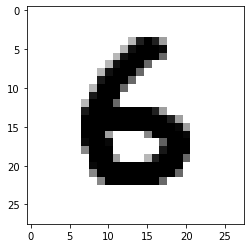

The Neural Network thinks its a 7 with a 1.0


In [11]:
custom = np.asarray(Image.open("number.png").convert("L")) / 255 # imports image and converts to grayscale pixels 0-1
set = np.expand_dims(custom, axis=0) #creates arbitrary dataset containg just the custom image

plt.figure()
plt.imshow(set[0], cmap = "gray")
plt.show()

prediction = model.predict(set) #feeds "dataset" into model
guess = np.argmax(prediction[0]) #retrieves guess
print("The Neural Network thinks its a", guess)
